## Some theories
* We want to automatically ignore low-risk entries. They should be forced to the bottom of our analysis.
* We want to highlight entries that flag "alarms" for the different analysts.
* Guns that are severely underpriced are scams or are deliberately mislabeled. [For instance.](http://www.armslist.com/posts/4747290/lima-ohio-shotguns-for-sale-trade--hoyt-)
* Guns that are severely overpriced may be general signals of willingness to deal with large amounts of cash, or large numbers of transactions. [For instance.](http://www.armslist.com/posts/4746478/west-virginia-handguns-want-to-buy--colt-pistols-and-revolvers)

So: Assuming that we can partition guns into distinct groups based on their prices, we can 

We primarily have price and weapons extractions available to us from armslist. (Soon we'll have price extractions from other sites, but not at this time. In practice, this means that we're really presenting some acceptable price ranges for arms list.

## Data prep (in which assumptions are encoded)

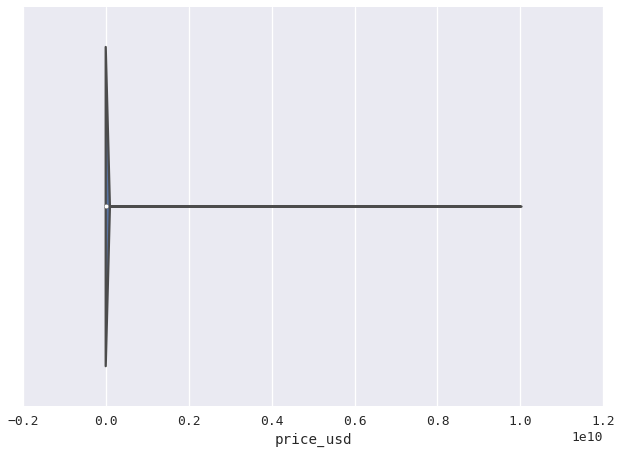

In [1]:
# We actually elide a lot that here...
%matplotlib inline
sns.set(context='talk', font='monospace')
df = pd.read_pickle('../armslist_data.pkl')
sns.violinplot(df.price_usd)

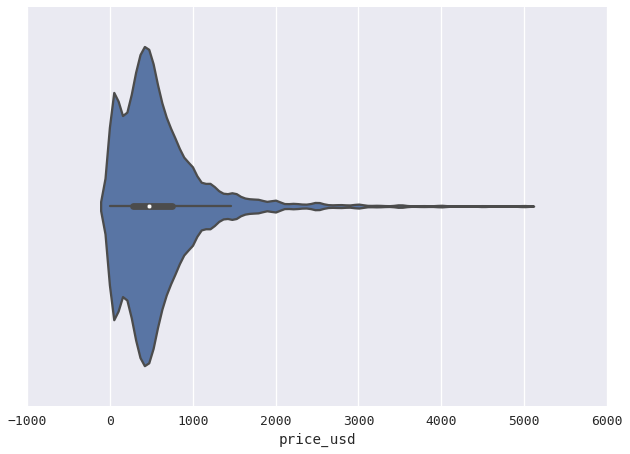

In [2]:
# Two crude price cutoffs
high_price = 5000
low_price = 2
df = df.ix[(df.price_usd <= high_price) & (df.price_usd >= low_price)]
sns.violinplot(df.price_usd)

## Gun Types and Price Ranges
### Shotguns

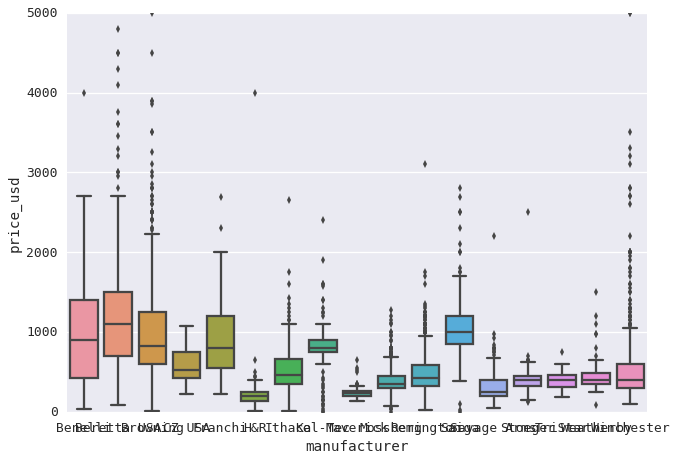

In [3]:
min_guns = 50
gun_type = 'Shotgun'

cur_df = df.ix[(df.category_3 == gun_type), :]
default_gun = cur_df.price_usd.describe()

cur_df = df.ix[(df.category_3 == gun_type) & (df.manufacturer != '?'), :]
cur_manufacturers = cur_df['manufacturer'].value_counts()
manufacturer_set = set(
    cur_df['manufacturer'].value_counts().ix[
        cur_df['manufacturer'].value_counts() >= min_guns
    ].index)
cur_df_reduced = cur_df.ix[cur_df.manufacturer.apply(lambda x: x in manufacturer_set),
                                   ['manufacturer', 'price_usd']]
cur_df_reduced.ix[:, 'manufacturer'] = cur_df_reduced.manufacturer.astype(str).astype('category')
sns.boxplot(x='manufacturer', y='price_usd', data=cur_df_reduced)

In [4]:
describe_df = cur_df_reduced.groupby('manufacturer').describe().unstack()
describe_df.columns = describe_df.columns.get_level_values(1)
describe_df.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
Remington,1294,480.069552,229.120727,20,325.00,425.0,583.75,3100
Mossberg,1290,378.467442,147.601394,2,291.25,350.0,450.00,1270
Browning,590,1026.310169,650.471531,5,600.00,825.0,1250.00,5000
Winchester,528,574.323864,547.843427,100,300.00,400.0,600.00,5000
Benelli,358,958.572626,588.083255,30,425.00,900.0,1400.00,4000
Savage Arms,216,316.314815,217.388566,45,200.00,250.0,400.00,2200
Beretta USA,214,1271.906542,830.801322,80,699.25,1100.0,1500.00,4800
Kel-Tec,200,806.760000,286.332804,2,750.00,800.0,900.00,2400
Saiga,185,1079.983784,410.838240,2,850.00,1000.0,1200.00,2800


In [5]:
describe_df['lower_bound'] = describe_df.apply(lambda x: max(low_price, x['mean'] - 2*x['std']), axis=1)
describe_df['upper_bound'] = describe_df.apply(lambda x: min(high_price, x['mean'] + 2*x['std']), axis=1)

describe_df.ix[:, ['lower_bound', 'upper_bound']]

,lower_bound,upper_bound
manufacturer,,
Benelli,2.000000,2134.739136
Beretta USA,2.000000,2933.509186
Browning,2.000000,2327.253231
CZ USA,157.849745,990.729965
Franchi,2.000000,1952.589039
H&R,2.000000,890.380241
Ithaca,2.000000,1280.119869
Kel-Tec,234.094392,1379.425608
Maverick,69.346521,439.840979


In [6]:
describe_df.ix[:, ['lower_bound', 'upper_bound']].reset_index().to_csv('shotgun_price_bounds.csv', index=False)
shotgun_dict = describe_df.ix[:, ['lower_bound', 'upper_bound']].to_dict('index')
shotgun_dict['?'] = {'lower_bound': max(low_price, default_gun['mean'] - 2*default_gun['std']),
                    'upper_bound': min(high_price,default_gun['mean'] + 2*default_gun['std'])}

### Revolver

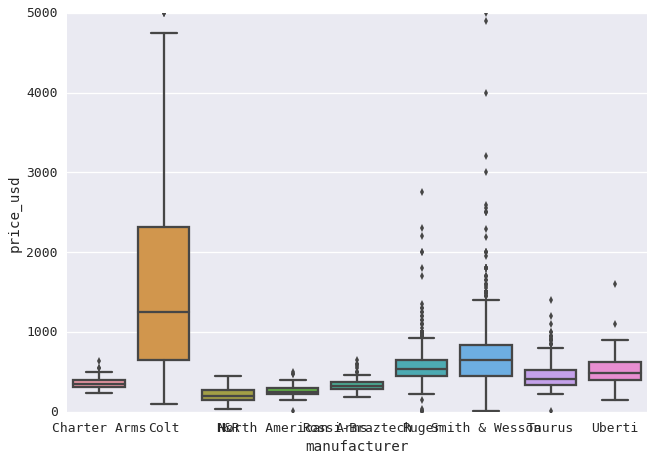

In [7]:
min_guns = 50
gun_type = 'Revolver'

cur_df = df.ix[(df.category_3 == gun_type), :]
default_gun = cur_df.price_usd.describe()

cur_df = df.ix[(df.category_3 == gun_type) & (df.manufacturer != '?'), :]
cur_manufacturers = cur_df['manufacturer'].value_counts()
manufacturer_set = set(
    cur_df['manufacturer'].value_counts().ix[
        cur_df['manufacturer'].value_counts() >= min_guns
    ].index)
cur_df_reduced = cur_df.ix[cur_df.manufacturer.apply(lambda x: x in manufacturer_set),
                                   ['manufacturer', 'price_usd']]
cur_df_reduced.ix[:, 'manufacturer'] = cur_df_reduced.manufacturer.astype(str).astype('category')
sns.boxplot(x='manufacturer', y='price_usd', data=cur_df_reduced)

In [8]:
describe_df = cur_df_reduced.groupby('manufacturer').describe().unstack()
describe_df.columns = describe_df.columns.get_level_values(1)
describe_df.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
manufacturer,,,,,,,,
Smith & Wesson,1852,703.215443,356.797074,5,450,650,839.00,5000
Ruger,1352,570.936391,195.828190,4,450,530,649.00,2750
Taurus,613,448.437194,158.106922,12,340,405,524.00,1400
Colt,413,1552.961259,1080.090649,100,650,1250,2310.00,5000
Charter Arms,129,357.883721,64.234024,230,310,350,399.00,640
Rossi-Braztech,129,334.736434,83.304085,190,286,325,369.00,650
North American Arms,101,262.910891,69.836394,7,225,250,300.00,500
Uberti,68,527.352941,214.083940,150,400,480,621.25,1600
H&R,57,209.508772,83.615216,40,150,199,275.00,450


In [9]:
describe_df['lower_bound'] = describe_df.apply(lambda x: max(low_price, x['mean'] - 2*x['std']), axis=1)
describe_df['upper_bound'] = describe_df.apply(lambda x: min(high_price, x['mean'] + 2*x['std']), axis=1)

describe_df.ix[:, ['lower_bound', 'upper_bound']]

,lower_bound,upper_bound
manufacturer,,
Charter Arms,229.415673,486.351768
Colt,2.000000,3713.142556
H&R,42.278339,376.739204
North American Arms,123.238102,402.583680
Rossi-Braztech,168.128264,501.344605
Ruger,179.280011,962.592770
Smith & Wesson,2.000000,1416.809590
Taurus,132.223350,764.651038
Uberti,99.185062,955.520821


In [10]:
describe_df.ix[:, ['lower_bound', 'upper_bound']].reset_index().to_csv('revolver_price_bounds.csv', index=False)
revolver_dict = describe_df.ix[:, ['lower_bound', 'upper_bound']].to_dict('index')
revolver_dict['?'] = {'lower_bound': max(low_price, default_gun['mean'] - 2*default_gun['std']),
                      'upper_bound': min(high_price,default_gun['mean'] + 2*default_gun['std'])}

### Glock
Unlike the others we've done so far, Glock is a *specific manufacturer*.

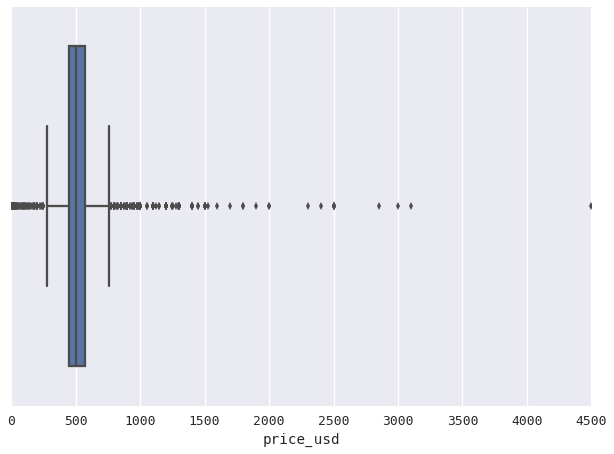

In [11]:
glock_df = df.ix[df.manufacturer == 'Glock', :]
default_gun = glock_df.price_usd.describe()

sns.boxplot(glock_df.price_usd)

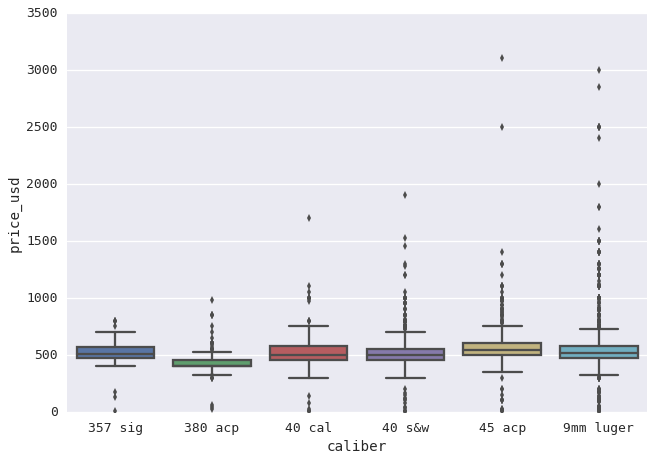

In [12]:
# We can get a bit more precise by looking into calibers

caliber_set = set(
    glock_df.caliber.value_counts().ix[
        (glock_df.caliber.value_counts() >= min_guns)
    ].index)
caliber_set.remove('?')
cur_df_reduced = glock_df.ix[glock_df.caliber.apply(lambda x: x in caliber_set),
                                   ['caliber', 'price_usd']]
cur_df_reduced.ix[:, 'caliber'] = cur_df_reduced.caliber.astype(str).astype('category')
sns.boxplot(x='caliber', y='price_usd', data=cur_df_reduced)

In [13]:
describe_df = cur_df_reduced.groupby('caliber').describe().unstack()
describe_df.columns = describe_df.columns.get_level_values(1)
describe_df.sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
caliber,,,,,,,,
9mm luger,1663,555.228503,221.120845,9,475,519.0,575.5,3000
40 s&w,1037,524.488910,139.606857,5,450,500.0,550.0,1900
45 acp,770,560.524675,183.401391,10,500,539.0,600.0,3100
380 acp,304,428.236842,87.676064,25,399,400.5,450.0,980
40 cal,285,525.698246,153.808598,5,450,500.0,575.0,1700
357 sig,78,518.538462,122.533186,10,475,502.0,567.5,800


In [14]:
describe_df['lower_bound'] = describe_df.apply(lambda x: max(low_price, x['mean'] - 2*x['std']), axis=1)
describe_df['upper_bound'] = describe_df.apply(lambda x: min(high_price, x['mean'] + 2*x['std']), axis=1)

describe_df.ix[:, ['lower_bound', 'upper_bound']]

,lower_bound,upper_bound
caliber,,
357 sig,273.472090,763.604833
380 acp,252.884714,603.588971
40 cal,218.081051,833.315441
40 s&w,245.275197,803.702624
45 acp,193.721893,927.327458
9mm luger,112.986814,997.470192


In [15]:
glock_general = (146.67908294, 928.44617458)
describe_df.ix[:, ['lower_bound', 'upper_bound']].reset_index().to_csv('glock_price_bounds.csv', index=False)
glock_dict = describe_df.ix[:, ['lower_bound', 'upper_bound']].to_dict('index')
glock_dict['?'] = {'lower_bound': max(low_price, default_gun['mean'] - 2*default_gun['std']),
                   'upper_bound': min(high_price,default_gun['mean'] + 2*default_gun['std'])}

### Rifles

In [56]:
df.category_3.value_counts()

Pistol                  25558
Rifle                   23387
                        23056
Shotgun                  6760
Revolver                 5338
Muzzle Loader             603
Derringer                 191
Lever-Action Handgun       46
Suppressors                41
dtype: int64

# Evaluations...

But how well do these threshold values work on the *scored* armslist data?

In [38]:
def kappa(a,b,c,d):
    tot = a + b + c + d
    Pa  = float(a + d)/tot
    PA1 = float(a + b)/tot
    PA2 = 1.0- PA1
    PB1 = float(a + c) /tot
    PB2 = 1.0 -PB1
    Pe  = PA1 *PB1 + PA2*PB2
    print(Pa, PA1, PB1, PA2, PB2)
    return (Pa -Pe)/ (1.0 -Pe)

def check_price_for_key(x, check_dict, key_name):
    cur_key = x[key_name]
    if cur_key not in check_dict:
        cur_key = '?'
        
    normalized = (1.*x['price_usd'] - check_dict[cur_key]['lower_bound'])/check_dict[cur_key]['upper_bound']
    normalized = max(0., min(1.0, normalized))
    if normalized == 1.:
        return 'medium_or_high'
    return 'low'

In [39]:
cp2_df = pd.read_pickle('../cp2_data.pkl')
shot_test = cp2_df.ix[(cp2_df.category_3=='Shotgun'), ['manufacturer', 'price_usd', 'simple_risk_profile']].dropna()
rev_test = cp2_df.ix[(cp2_df.category_3=='Revolver'), ['manufacturer', 'price_usd', 'simple_risk_profile']].dropna()
glock_test = cp2_df.ix[(cp2_df.category_3=='Revolver'), ['caliber', 'price_usd', 'simple_risk_profile']].dropna()

In [40]:
shot_test.simple_risk_profile.value_counts()

low               83
medium_or_high     5
Name: simple_risk_profile, dtype: int64

In [42]:
shot_test['risk_by_price'] = shot_test.apply(lambda x: check_price_for_key(x, shotgun_dict, 'manufacturer'), axis=1)

In [43]:
pd.crosstab(shot_test['risk_by_price'], shot_test['simple_risk_profile'])

simple_risk_profile,low,medium_or_high
risk_by_price,,
low,81,4
medium_or_high,2,1


In [44]:
kappa(81, 4, 2, 1)

0.9318181818181818 0.9659090909090909 0.9431818181818182 0.03409090909090906 0.05681818181818177


0.21661721068249082

In [45]:
rev_test.simple_risk_profile.value_counts()

low               84
medium_or_high     4
Name: simple_risk_profile, dtype: int64

In [46]:
rev_test['risk_by_price'] = rev_test.apply(lambda x: check_price_for_key(x, revolver_dict, 'manufacturer'), axis=1)

In [47]:
pd.crosstab(rev_test['risk_by_price'], rev_test['simple_risk_profile'])

simple_risk_profile,low,medium_or_high
risk_by_price,,
low,78,3
medium_or_high,6,1


In [48]:
kappa(78, 3, 6, 1)

0.8977272727272727 0.9204545454545454 0.9545454545454546 0.07954545454545459 0.045454545454545414


0.13157894736842085

In [49]:
glock_test.simple_risk_profile.value_counts()

low               84
medium_or_high     4
Name: simple_risk_profile, dtype: int64

In [51]:
glock_test['risk_by_price'] = glock_test.apply(lambda x: check_price_for_key(x, glock_dict, 'caliber'), axis=1)

In [52]:
pd.crosstab(glock_test['risk_by_price'], glock_test['simple_risk_profile'])

simple_risk_profile,low,medium_or_high
risk_by_price,,
low,65,3
medium_or_high,19,1


In [53]:
kappa(65, 3, 19, 1)

0.75 0.7727272727272727 0.9545454545454546 0.2272727272727273 0.045454545454545414


0.008196721311475164